In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
fish = pd.read_csv('./Fish.csv')
print(f'data shape: {fish.shape}')
print(fish.head())


data shape: (159, 7)
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


In [4]:
print(fish.columns)

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')


In [5]:
X = fish['Weight'].values
y = fish['Length1'].values
X

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [19]:
#convert from 1D to 2D for lm.fit to use (linear regression)
X_shape = X.reshape(-1,1)
X_shape

array([[ 242. ],
       [ 290. ],
       [ 340. ],
       [ 363. ],
       [ 430. ],
       [ 450. ],
       [ 500. ],
       [ 390. ],
       [ 450. ],
       [ 500. ],
       [ 475. ],
       [ 500. ],
       [ 500. ],
       [ 340. ],
       [ 600. ],
       [ 600. ],
       [ 700. ],
       [ 700. ],
       [ 610. ],
       [ 650. ],
       [ 575. ],
       [ 685. ],
       [ 620. ],
       [ 680. ],
       [ 700. ],
       [ 725. ],
       [ 720. ],
       [ 714. ],
       [ 850. ],
       [1000. ],
       [ 920. ],
       [ 955. ],
       [ 925. ],
       [ 975. ],
       [ 950. ],
       [  40. ],
       [  69. ],
       [  78. ],
       [  87. ],
       [ 120. ],
       [   0. ],
       [ 110. ],
       [ 120. ],
       [ 150. ],
       [ 145. ],
       [ 160. ],
       [ 140. ],
       [ 160. ],
       [ 169. ],
       [ 161. ],
       [ 200. ],
       [ 180. ],
       [ 290. ],
       [ 272. ],
       [ 390. ],
       [ 270. ],
       [ 270. ],
       [ 306. ],
       [ 540. 

## first five rows of fish dataset


In [20]:
fish.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## description and info of fish data set

In [21]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [22]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## split data into train and test using regression model

In [23]:
X = fish['Weight'].values
y = fish['Length1'].values

print(X)
print(y)

[ 242.   290.   340.   363.   430.   450.   500.   390.   450.   500.
  475.   500.   500.   340.   600.   600.   700.   700.   610.   650.
  575.   685.   620.   680.   700.   725.   720.   714.   850.  1000.
  920.   955.   925.   975.   950.    40.    69.    78.    87.   120.
    0.   110.   120.   150.   145.   160.   140.   160.   169.   161.
  200.   180.   290.   272.   390.   270.   270.   306.   540.   800.
 1000.    55.    60.    90.   120.   150.   140.   170.   145.   200.
  273.   300.     5.9   32.    40.    51.5   70.   100.    78.    80.
   85.    85.   110.   115.   125.   130.   120.   120.   130.   135.
  110.   130.   150.   145.   150.   170.   225.   145.   188.   180.
  197.   218.   300.   260.   265.   250.   250.   300.   320.   514.
  556.   840.   685.   700.   700.   690.   900.   650.   820.   850.
  900.  1015.   820.  1100.  1000.  1100.  1000.  1000.   200.   300.
  300.   300.   430.   345.   456.   510.   540.   500.   567.   770.
  950.  1250.  1600.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X_shape,y,train_size=0.8,test_size=0.2,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (127, 1)
y_train shape (127,)
X_test shape (32, 1)
y_test shape (32,)
[20.5 28.7 41.1 29.4 27.6 34.5 44.8 24.  11.7 23.6 35.  12.5 32.  33.5
 36.5 20.  19.1 19.  33.7 25.4 29.5 36.2 19.3 10.4 21.  13.8 39.8 31.3
 32.8 16.2 30.  11.3]


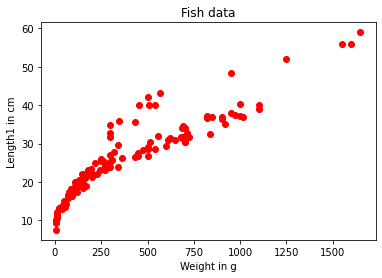

In [28]:
%matplotlib inline
plt.scatter(x_train,y_train,color='red')
plt.xlabel('Weight in g')
plt.ylabel('Length1 in cm')
plt.title('Fish data')
plt.show()

In [30]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 84.22 %
Test accuracy 81.86 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

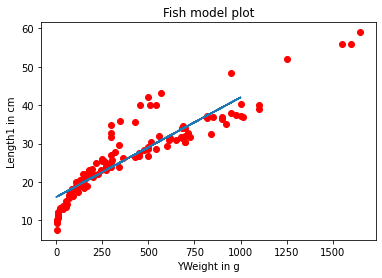

In [31]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("YWeight in g")
plt.ylabel("Length1 in cm")
plt.title("Fish model plot")
plt.plot

# conclusions:


## 1: the longer the fish is in cm, the ore it weighs in g
## 2: the more the fish weighs in g the longer it is in cm
## 3: some fish may be very long, but very thin, making them weigh less in g